### PCA 

is a widely used technique for dimensionality reduction.

It transforms a dataset with many features into a smaller set of uncorrelated features. Aim is to retain as much variance as possible.

It creates new features that are the linear combination of the original features.

- PCA finds **new axes** (called **principal components**) that:
  - Are **orthogonal** to each other
  - Capture the **maximum variance** in the data
- It rotates the coordinate system to align with the directions of **maximum spread**.


### Steps

1) Start with your data with n samples and d features( n x d ).
2) Center the data: Subtract the mean from each column:
X_centered   =   X−μ

Now, data is centered around the origin.

3) Compute the Covariance Matrix
Covariance tells us how features vary together:

cov = (1/n-1)* (X_centered^T)*(XT_centered)

- Diagonal: variances of features
- Off-diagonal: relationships between features

4) Find the eigenvalue and the eigenvectors

cov (v) = lamda (v)

where v= eigenvector(a new direction)

lamda=variance in that direction



5) **Sort and Select Top Components**

Sort eigenvectors by descending eigenvalues.

Select the top k eigenvectors:

Wk =  [v1, v2, v3, ..., vk]

Wk is d x k matrix

6) Project the original (centered) data onto the new k dimensional space

Z = X_centred * Wk

Z is a n X k matrix

Data X (m x n)

     |

[Center Columns]

     ↓

X_centered (m x n)

     |

[Apply SVD: X = U Σ Vᵀ]

     ↓

V = Principal Directions (n x k) - n samples, k features

Σ = Singular Values (Variance) k x k 

     |

[Project to Lower Dimension]

     ↓

Z = X_centered × V_k  → (m x k)


In [1]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

X = load_digits().data
y= load_digits().target
print(X.shape, y.shape)

(1797, 64) (1797,)


In [3]:
estimator = PCA(n_components=2)
X_pca = estimator.fit_transform(X)
print(X_pca.shape)

(1797, 2)


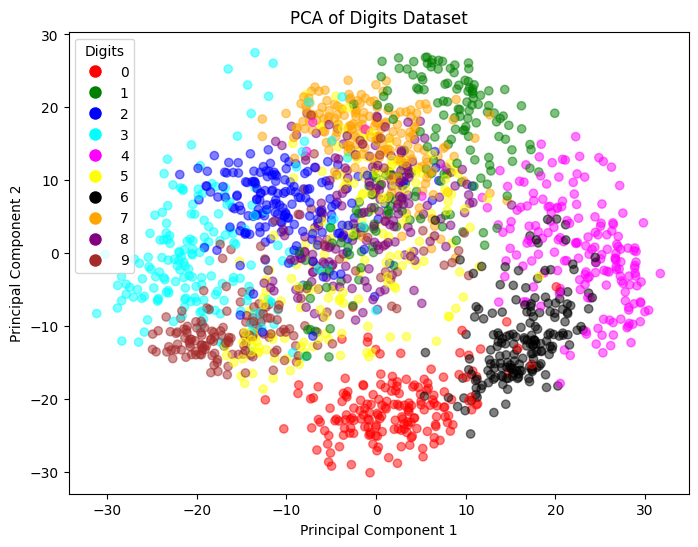

In [8]:
#plot with the colors for the digits
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
#define distince colors for each digit
colrs= ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']
#scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=[colrs[i] for i in y], alpha=0.5)
plt.title('PCA of Digits Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=str(i), markerfacecolor=colrs[i], markersize=10) for i in range(10)], title='Digits')
plt.show()

it is easier to classify digit 0 , 4 ..they are easily seperable

5 is quite hard to seperate


## Steps to Use PCA in ML

###  Standardize the Features

1) PCA is sensitive to scale. Always normalize:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

2) 
Apply PCA

``` python
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # keep 95% of variance
X_pca = pca.fit_transform(X_scaled)
```

3) 
``` python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_pca, y)
```

## Example

``` python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', RandomForestClassifier())
])

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)